In [1]:
from urbanwb.main import (
    read_inputdata,
    read_parameters,
    running,
    batch_run_sdf,
    read_parameter_base,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#####################
### CONFIGURATION ###
#####################

# Run name
run_name = 'Paramaribo_wakapasi_Swales'

# Input files
input_csv = "../input/forcing_Paramaribo_33_years_24_h.csv"
catchment_properties = "../input/ep_neighbourhood_Paramaribo_area1.ini"
measure_file = "../input/ep_measure_Paramaribo_on.ini" # veranderen bij measures

# Total years of rainfall input
num_years = 33

# A list of discharge capacities from open water to outside the model area [mm/d over project area], used for the SDF curve
# Baseline is applied to determine the fixed periods of the runoff events that are applied in these calculations
# Baseline has to be large enough to prevent very long periods for runoff events
# (recommended is to select a value that is larger than 2x average daily rainfall)
q_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10] #SDF curve for different pump capacities
baseline_q = 4.4 # standard discharge capacity of pumping station

In [2]:
# Run the model. 'base_run' is a pandas DataFrame in which all model variables are stored.
inputdata = read_inputdata(input_csv)
dict_param = read_parameters(catchment_properties, measure_file)
base_run = running(inputdata, dict_param)
# base_run[0].to_excel("pysol/full-output.xlsx", index=False)
base_run[0].to_csv("pysol/" + f'{run_name}' + "-output.csv", index=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7920.36it/s]


Water balance statistics: 
Water balance is closed for measure itself.


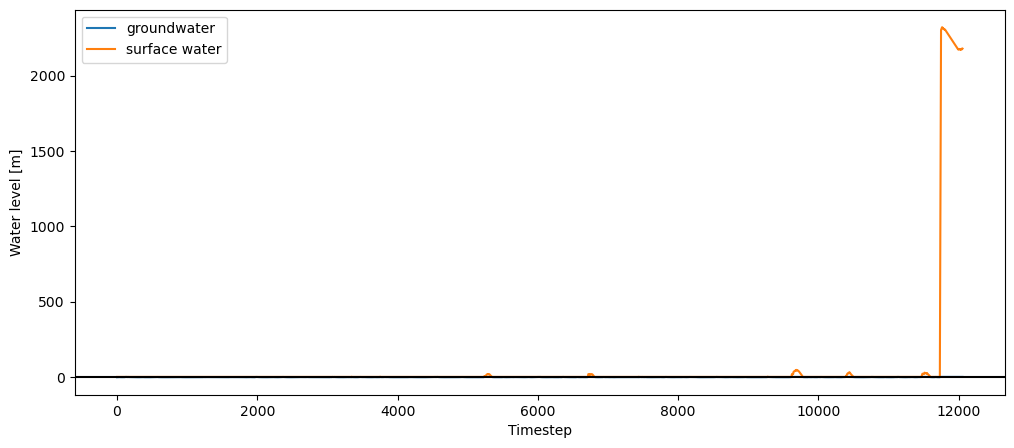

In [3]:
fig, ax = plt.subplots(1, figsize=(12, 5))

(base_run[0]["gwl"]*-1).plot(label = 'groundwater')
(dict_param['ow_level']-base_run[0]["owl"]).plot(label = 'surface water')

#plt.plot((base_run[0]["gwl"]*-1), base_run[0]["Date"], label = 'groundwater')
#plt.plot((0.9-base_run[0]["owl"]), base_run[0]["Date"], label = 'surface water')
plt.axhline(y=0, color="black")

ax.set_ylabel('Water level [m]')
ax.set_xlabel('Timestep')

plt.legend();

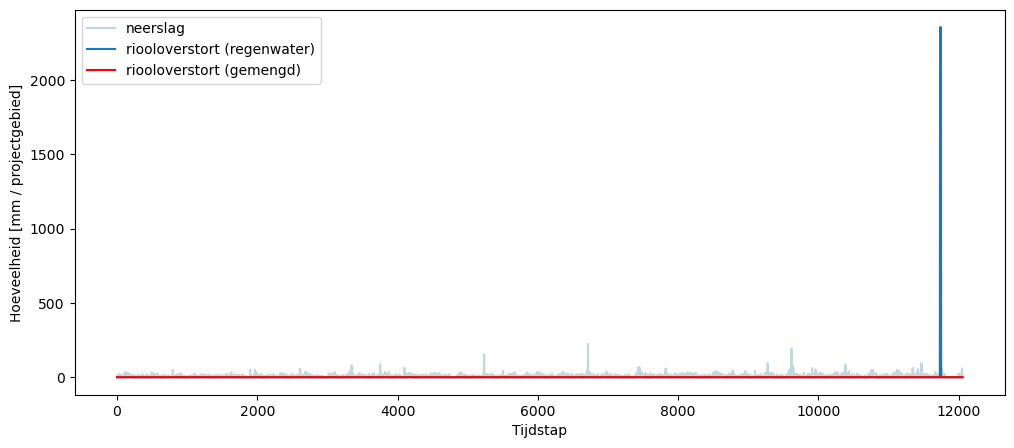

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 5))

base_run[0]["P_atm"].plot(label = 'neerslag', color='#bfd7dd')
base_run[0]["so_swds_ow"].plot(label = 'riooloverstort (regenwater)')
base_run[0]["so_mss_ow"].plot(label = 'riooloverstort (gemengd)', color='r')

ax.set_ylabel('Hoeveelheid [mm / projectgebied]')
ax.set_xlabel('Tijdstap')

plt.legend()

In [5]:
# Function for the logarithmic equation
def func(a, b, x):
    return a * np.log(x) + b


# Import open water fraction, used for transformation of required storage to mm over the project area
# Note that the check of whether area type 1 or 0 is used, is done in the function read_parameter_base
params = read_parameter_base(catchment_properties)
ow_frac = params["tot_ow_area"] / params["tot_area"]


sdf = batch_run_sdf(
    input_csv,
    catchment_properties,
    measure_file,
    f'{run_name}' + "-output-sdf.csv",
    q_list,
    baseline_q=baseline_q,
)

sdf = pd.read_csv(f'{run_name}' + "-output-sdf.csv", index_col=0)

The length of input time series is around 33 year
Mean daily rainfall is 6.22 mm/d
First, do baseline run:
Baseline pumping capacity is 4.4 mm/d to make fixed marks


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:02<00:00, 5615.87it/s]


Water balance statistics: 
Water balance is closed for measure itself.
----------------------------------------
q value to batch run: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.4, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Running: pumping capacity from open water to outside is 0.5 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:02<00:00, 5392.81it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 0.5 mm/d is 1252.4728 m
----------------------------------------
Running: pumping capacity from open water to outside is 1.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 6242.37it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 1.0 mm/d is 1089.0288 m
----------------------------------------
Running: pumping capacity from open water to outside is 1.5 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 6542.37it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 1.5 mm/d is 925.7464 m
----------------------------------------
Running: pumping capacity from open water to outside is 2.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7061.93it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 2.0 mm/d is 777.2279 m
----------------------------------------
Running: pumping capacity from open water to outside is 2.5 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7858.43it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 2.5 mm/d is 631.9021 m
----------------------------------------
Running: pumping capacity from open water to outside is 3.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7790.77it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 3.0 mm/d is 488.2464 m
----------------------------------------
Running: pumping capacity from open water to outside is 3.5 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7981.92it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 3.5 mm/d is 275.2426 m
----------------------------------------
Running: pumping capacity from open water to outside is 4.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7698.13it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 4.0 mm/d is 46.9843 m
----------------------------------------
Running: pumping capacity from open water to outside is 4.4 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 8061.99it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 4.4 mm/d is 42.2809 m
----------------------------------------
Running: pumping capacity from open water to outside is 4.5 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 6216.16it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 4.5 mm/d is 41.8591 m
----------------------------------------
Running: pumping capacity from open water to outside is 5.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 8017.29it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 5.0 mm/d is 38.7380 m
----------------------------------------
Running: pumping capacity from open water to outside is 6.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 6426.97it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 6.0 mm/d is 24.9598 m
----------------------------------------
Running: pumping capacity from open water to outside is 7.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 6501.06it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 7.0 mm/d is 1.5932 m
----------------------------------------
Running: pumping capacity from open water to outside is 8.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 7892.71it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 8.0 mm/d is 1.5317 m
----------------------------------------
Running: pumping capacity from open water to outside is 9.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 8002.27it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 9.0 mm/d is 1.4702 m
----------------------------------------
Running: pumping capacity from open water to outside is 10.0 mm/d over entire area


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12053/12053 [00:01<00:00, 8073.25it/s]


Water balance statistics: 
Water balance is closed for measure itself.
Maximum storage height above target water level over open water for Q = 10.0 mm/d is 1.4087 m
----------------------------------------


In [6]:
sdf["Treturn"] = num_years / (sdf.index + 1)
sdf.keys()
sdf.columns[1:-1]

Index(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.4', '4.5',
       '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'],
      dtype='object')

C:\Users\man_mx\AppData\Local\Temp\ipykernel_10792\1566141411.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_vars.loc[i] = [col, a, b]


,1,2,5,10,20,50,100
0.5,699.442593,940.106151,1258.246071,1498.909629,1739.573188,2057.713107,2298.376666
1.0,601.293046,813.529830,1094.091597,1306.328380,1518.565164,1799.126931,2011.363714
1.5,503.666090,687.390977,930.262066,1113.986952,1297.711839,1540.582928,1724.307815
2.0,413.299205,568.903663,774.601568,930.206026,1085.810484,1291.508389,1447.112847
2.5,325.649316,453.284566,622.009189,749.644440,877.279690,1046.004314,1173.639564
3.0,239.748274,339.708812,471.849456,571.809994,671.770532,803.911175,903.871713
3.5,105.822722,163.645738,240.083606,297.906622,355.729638,432.167506,489.990522
4.0,5.836020,11.108546,18.078448,23.350974,28.623501,35.593402,40.865929
4.4,2.042545,4.197474,7.046136,9.201065,11.355995,14.204656,16.359586
4.5,1.958812,4.034550,6.778526,8.854263,10.930001,13.673976,15.749714


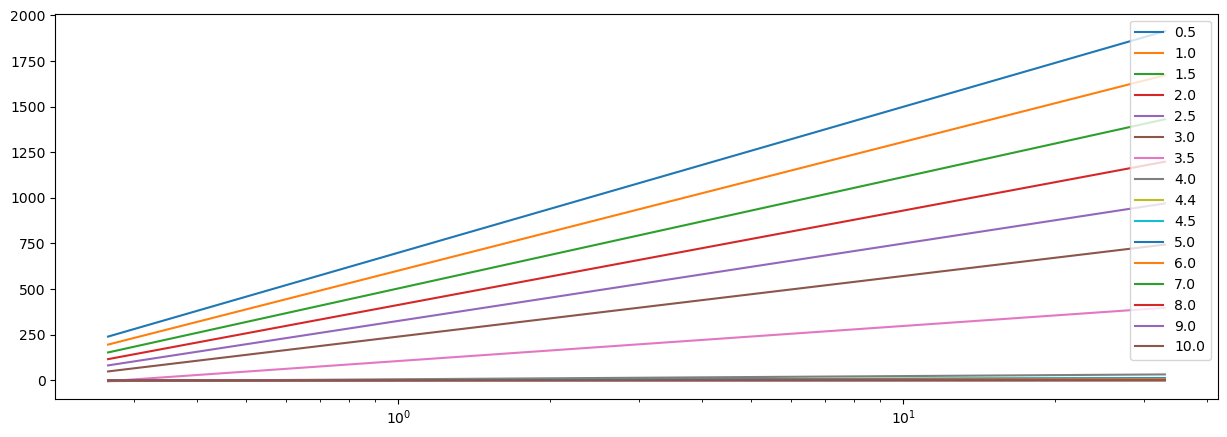

In [7]:
# Obtain the logarithmic equation for the pumping capacity
sdf["Treturn"] = num_years / (sdf.index + 1)

# skip the first column, which is the baseline, and Treturn
colnames = sdf.columns[1:-1]
plt.figure(figsize=(15, 5))
df_vars = pd.DataFrame(columns=["q", "a", "b"])
df_vars["q"] = np.zeros(len(sdf.keys()[1:-1]))

for i, col in enumerate(colnames):
    x = (
        sdf["Treturn"][0:150]
        .reindex(sdf["Treturn"][0:150].index[::-1])
        .reset_index(drop=True)
    )
    y = sdf[col][0:150].reindex(sdf[col][0:150].index[::-1]).reset_index(drop=True)
    a, b = np.polyfit(np.log(x), y, 1)

    df_vars.loc[i] = [col, a, b]

    # plt.plot(x,y)
    plt.plot(x, func(a, b, x), label=col)

plt.xscale("log")
plt.legend()

# Calculate required storage capacity for a set of return periods
req_storage = pd.DataFrame()
req_storage["Treturn"] = [1, 2, 5, 10, 20, 50, 100]
for i, key in enumerate(df_vars["q"]):
    req_storage[key] = func(df_vars["a"][i], df_vars["b"][i], req_storage["Treturn"])
req_storage = req_storage.set_index("Treturn")
req_storage.index.name = None
req_storage = req_storage.T
req_storage

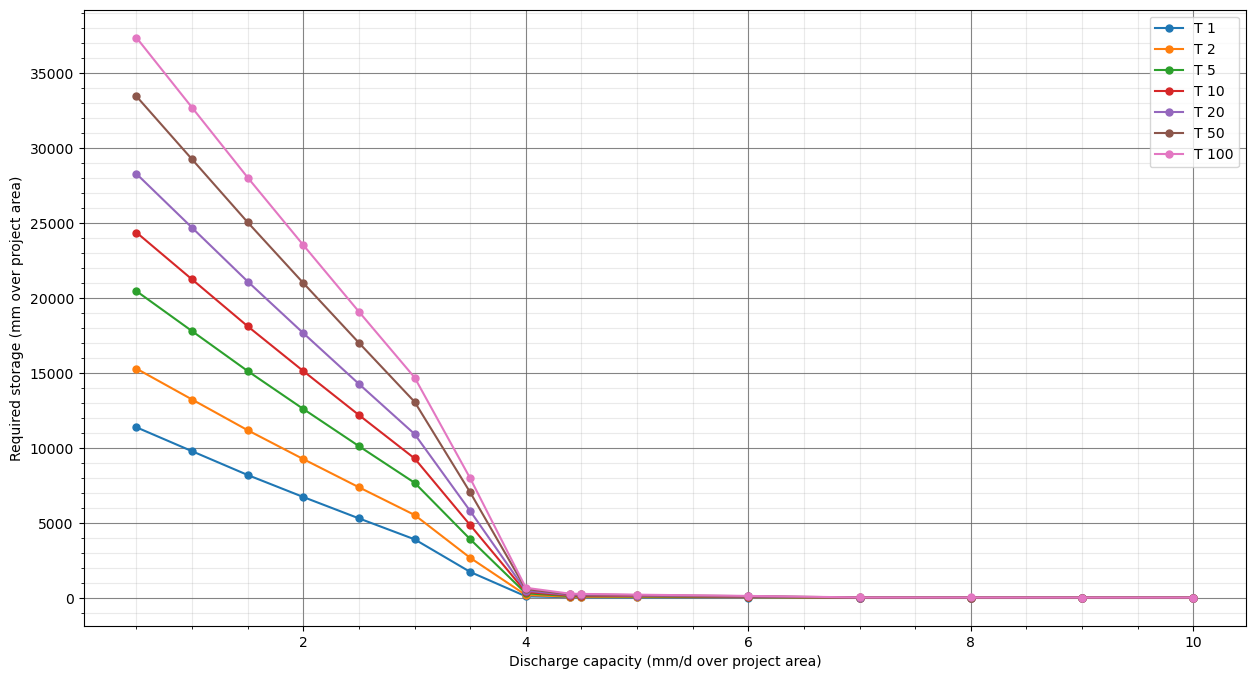

In [8]:
# SDF Curve
# parameter y_stor is applied to express the calculated required storage in mm over the entire project area
plt.figure(figsize=(15, 8))
for key in req_storage:
    x_dis = req_storage.index.values.astype("float64")
    y_stor = req_storage[key] * ow_frac * 1000
    plt.plot(
        x_dis[y_stor > -0.001], y_stor[y_stor > -0.001], label=f'T {key}', ms=10, marker="."
    )
plt.grid(which="major", color="#666666", linestyle="-", alpha=0.8)
plt.minorticks_on()
plt.grid(which="minor", color="#999999", linestyle="-", alpha=0.2)
plt.ylabel("Required storage (mm over project area)")
plt.xlabel("Discharge capacity (mm/d over project area)")
plt.legend()
plt.savefig(f"SDF_{run_name}.png")